In [2]:
# Import Main Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# --- Import Dataset 1
dataset = pd.read_csv('11-df_coffee/dataset.csv')
df = dataset.head(5)
print(df)
print(dataset.shape)
# --- Changing pandas dataframe to numpy array to determine X and y variables
X = dataset.iloc[:,:85]#.values
y = dataset.iloc[:,85:86]#.values       # 1:arabica, 0:robusta
(_,Xcol) = X.shape
num_features = Xcol
print(num_features)
# --- Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
# --- Determine classes (y variable) in training set
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
# --- Separating the dataset into training and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

     r_mean    g_mean    b_mean       r_sd       g_sd      b_sd        r_var  \
0  73.86099  68.86044  59.46820  106.10943   99.02504  85.62152  11259.21169   
1  92.73501  85.88042  74.07860  113.45641  105.18932  90.81630  12872.35644   
2  75.48632  71.07239  62.96237  109.01329  102.79160  91.26955  11883.89730   
3  82.26904  77.83862  68.19653  113.92914  107.89192  94.63484  12979.84961   
4  87.46834  82.69544  72.14112  115.39828  109.34813  95.78755  13316.76273   

         g_var       b_var   r_skew  ...  solidity  minor_axis_length  \
0   9805.95758  7331.04415  0.78944  ...   0.98445          100.31511   
1  11064.79390  8247.60065  0.45205  ...   0.99115           87.59649   
2  10566.11268  8330.13105  0.80180  ...   0.98582          108.09832   
3  11640.66585  8955.75337  0.70586  ...   0.98174           97.48833   
4  11957.01452  9175.25387  0.60568  ...   0.98760           97.26645   

   major_axis_length  compactness  convex_area      SF1      SF2      SF3  \
0  

Epoch 1/100
48/48 [==============================] - 1s 6ms/step - loss: 0.4530 - accuracy: 0.8607 - val_loss: 0.1465 - val_accuracy: 0.9594
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0902 - accuracy: 0.9751 - val_loss: 0.0505 - val_accuracy: 0.9884
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9801 - val_loss: 0.0487 - val_accuracy: 0.9855
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9851 - val_loss: 0.0677 - val_accuracy: 0.9681
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9888 - val_loss: 0.0389 - val_accuracy: 0.9913
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0559 - val_accuracy: 0.9797
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9950 - val_loss: 0.0544 - val_accuracy: 0.9797
Epoch 8/100
4

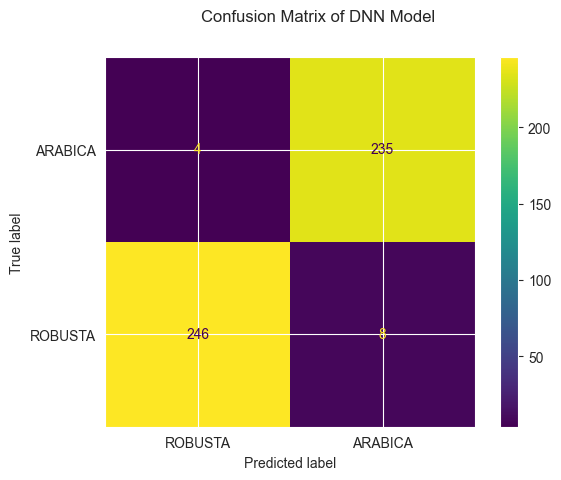

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       254
           1       0.97      0.98      0.98       239

    accuracy                           0.98       493
   macro avg       0.98      0.98      0.98       493
weighted avg       0.98      0.98      0.98       493



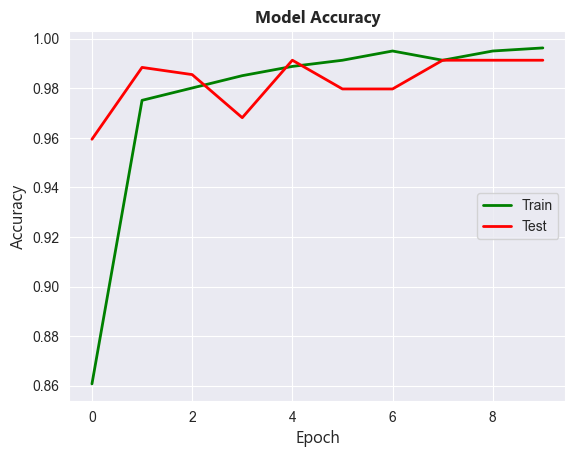

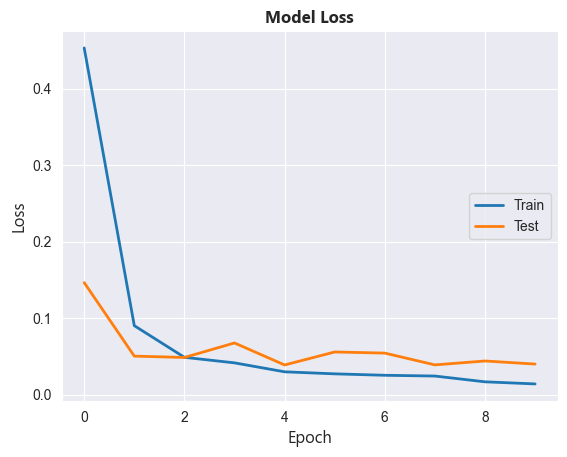

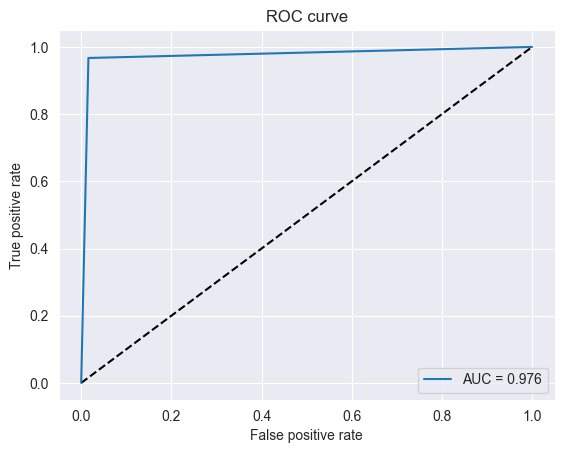

In [5]:
# BUILDING NEURAL NETWORK
# --- Libraries
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from keras import callbacks

def ann(X, Y, x, y, num_features):

    # --- Neural network
    model = Sequential()
    # --- Input dan 1st Hidden Layer
    model.add(Dense(100, input_dim=num_features, kernel_initializer='uniform', activation='relu'))
    # --- 2nd Hidden Layer
    model.add(Dense(50, kernel_initializer='uniform', activation='relu'))     # kernel_initializer='uniform',
    # --- Output Layer
    model.add(Dense(2, kernel_initializer='uniform', activation='sigmoid'))     #softmax untuk banyak kelas

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    # The important arguments : loss, optimizer, metrics
    # https://www.tutorialspoint.com/keras/keras_model_compilation.htm

    earlystopping = callbacks.EarlyStopping(monitor='val_loss',     # val_loss or val_accuracy
                                            min_delta=0,
                                            patience=5,             # the number of epochs for the training to be continued after the first halt
                                            verbose=0,
                                            mode='min',             # min for val_loss, max for val_accuracy, and auto for automatically monitors with the suitable mode.
                                            baseline=None,
                                            restore_best_weights=True)
    # callbacks and num epochs : https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/

    history = model.fit(X,
                        Y,
                        epochs=100,
                        batch_size=17,
                        validation_split=0.3,
                        callbacks=[earlystopping],
                        verbose=1)
    # batch_size vs iterations vs epochs = https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9
    y_pred = model.predict(x)

    # --- Converting predictions to label
    pred = list()
    for i in range(len(y_pred)):
        pred.append(np.argmax(y_pred[i]))
    # --- Converting one hot encoded test label to label
    test = list()
    for i in range(len(y)):
        test.append(np.argmax(y[i]))

    # MODEL's PERFORMANCE
    a = accuracy_score(pred,test)
    print('Accuracy is:', a*100)

    # --- Confusion Matrix
    cm = confusion_matrix(pred, test)
    print(cm)
    display = ConfusionMatrixDisplay(cm,display_labels=["ROBUSTA", "ARABICA"])
    display.plot()
    display.figure_.suptitle("Confusion Matrix of DNN Model")
    plt.gca().invert_yaxis()
    plt.show()

    # --- Performace Metrics
    res = classification_report(pred, test)
    print(res)
    # https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3

    plt.plot(history.history['accuracy'], linewidth=2.0, color='g')
    plt.plot(history.history['val_accuracy'], linewidth=2.0, color='r')
    plt.title('Model Accuracy', fontsize = 12, fontname="Segoe UI", fontweight='bold')
    plt.ylabel('Accuracy', fontname="Segoe UI", fontsize=12)
    plt.xlabel('Epoch', fontname="Segoe UI", fontsize=12)
    plt.legend(['Train', 'Test'], loc='center right', fontsize=10)
    plt.show()

    plt.plot(history.history['loss'], linewidth=2.0)
    plt.plot(history.history['val_loss'], linewidth=2.0)
    plt.title('Model Loss', fontname="Segoe UI", fontsize=12, fontweight='bold')
    plt.ylabel('Loss', fontname="Segoe UI", fontsize=12)
    plt.xlabel('Epoch', fontname="Segoe UI", fontsize=12)
    plt.legend(['Train', 'Test'], loc='center right', fontsize=10)
    plt.show()

    from sklearn.metrics import roc_curve, auc
    y_pred.ravel()
    fpr, tpr, threshold = roc_curve(test, pred)
    auc = auc(fpr, tpr)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))
    #plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    # https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/

if __name__ == '__main__':
    ann(X_train,y_train, X_test, y_test,num_features)
